# Analyzing Social Media Ad Campaigns: Insights on Performance Evaluation

### Exploratory Data Analysis (EDA) involves examining and visualizing social media ad campaign data to uncover patterns, trends, and anomalies. It helps in understanding the distribution of key metrics like reach, clicks, and conversion rates.

### Imported necessary python Libraries

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Retrieving the CSV Datafile

In [51]:
data = pd.read_csv ('sales.csv')
data

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.430000,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.820000,2,0
2,708771,916,103920,30-34,M,20,693,0,0.000000,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.250000,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.290000,1,1
...,...,...,...,...,...,...,...,...,...,...,...
1138,1314410,1178,179977,45-49,F,109,1129773,252,358.189997,13,2
1139,1314411,1178,179978,45-49,F,110,637549,120,173.880003,3,0
1140,1314412,1178,179979,45-49,F,111,151531,28,40.289999,2,0
1141,1314414,1178,179981,45-49,F,113,790253,135,198.710001,8,2


### .head() function gives first 5 rows of the dataset

In [54]:
data.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1


### 
.tail() function gives the last 5 rows of the data set

In [57]:
data.tail()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
1138,1314410,1178,179977,45-49,F,109,1129773,252,358.189997,13,2
1139,1314411,1178,179978,45-49,F,110,637549,120,173.880003,3,0
1140,1314412,1178,179979,45-49,F,111,151531,28,40.289999,2,0
1141,1314414,1178,179981,45-49,F,113,790253,135,198.710001,8,2
1142,1314415,1178,179982,45-49,F,114,513161,114,165.609999,5,2


### .info() gives the details of the dataset

data.info()

# DATA CLEANING

### Data Cleaning is used to clean the data, remove null values and unwanted data

In [63]:
pd.DataFrame(
    {
        'Data Type' : data.dtypes,
        'Missing count': data.isnull().sum(),
        'Unique count': data.nunique(),
        'Duplicate count':[ data[c].duplicated().sum() for c in data.columns]
    }
)

,Data Type,Missing count,Unique count,Duplicate count
ad_id,int64,0,1143,0
xyz_campaign_id,int64,0,3,1140
fb_campaign_id,int64,0,691,452
age,object,0,4,1139
gender,object,0,2,1141
interest,int64,0,40,1103
Impressions,int64,0,1130,13
Clicks,int64,0,183,960
Spent,float64,0,869,274
Total_Conversion,int64,0,32,1111


# CONVERSIONS

### Here we selected only int and float dtypes 
### describe() is used for describing the dataset

In [67]:
numeric = data.select_dtypes(include = ['int64' , 'float64'])
numeric.describe().apply(lambda s : s.apply(lambda x : f"{x:,.f}"))

,ad_id,xyz_campaign_id,fb_campaign_id,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
count,"1,143.00","1,143.00","1,143.00","1,143.00","1,143.00","1,143.00","1,143.00","1,143.00","1,143.00"
mean,"987,261.13","1,067.38","133,783.99",32.77,"186,732.13",33.39,51.36,2.86,0.94
std,"193,992.81",121.63,"20,500.31",26.95,"312,762.18",56.89,86.91,4.48,1.74
min,"708,746.00",916.00,"103,916.00",2.00,87.00,0.00,0.00,0.00,0.00
25%,"777,632.50",936.00,"115,716.00",16.00,"6,503.50",1.00,1.48,1.00,0.00
50%,"1,121,185.00","1,178.00","144,549.00",25.00,"51,509.00",8.00,12.37,1.00,1.00
75%,"1,121,804.50","1,178.00","144,657.50",31.00,"221,769.00",37.50,60.02,3.00,1.00
max,"1,314,415.00","1,178.00","179,982.00",114.00,"3,052,003.00",421.00,639.95,60.00,21.00


### Here we converted dtypes "object to category"

In [69]:
data['age'] = data['age'].astype('category')
data['gender'] = data['gender'].astype('category')

In [75]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   ad_id                1143 non-null   int64   
 1   xyz_campaign_id      1143 non-null   int64   
 2   fb_campaign_id       1143 non-null   int64   
 3   age                  1143 non-null   category
 4   gender               1143 non-null   category
 5   interest             1143 non-null   int64   
 6   Impressions          1143 non-null   int64   
 7   Clicks               1143 non-null   int64   
 8   Spent                1143 non-null   float64 
 9   Total_Conversion     1143 non-null   int64   
 10  Approved_Conversion  1143 non-null   int64   
dtypes: category(2), float64(1), int64(8)
memory usage: 83.0 KB


### .corr() measures the statistical relationship between different variables.

In [19]:
numeric = data.select_dtypes(include = ['int64','float64'])
correlation = numeric.corr()
correlation

,ad_id,xyz_campaign_id,fb_campaign_id,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
ad_id,1.000000,0.929892,0.972002,0.456483,0.462308,0.431981,0.433053,0.346539,0.271331
xyz_campaign_id,0.929892,1.000000,0.872392,0.272282,0.495273,0.469729,0.476689,0.346684,0.284968
fb_campaign_id,0.972002,0.872392,1.000000,0.595753,0.439439,0.406978,0.403532,0.344170,0.257658
interest,0.456483,0.272282,0.595753,1.000000,0.101973,0.088706,0.070226,0.120270,0.058353
Impressions,0.462308,0.495273,0.439439,0.101973,1.000000,0.948514,0.970386,0.812838,0.684249
Clicks,0.431981,0.469729,0.406978,0.088706,0.948514,1.000000,0.992906,0.694632,0.559526
Spent,0.433053,0.476689,0.403532,0.070226,0.970386,0.992906,1.000000,0.725379,0.593178
Total_Conversion,0.346539,0.346684,0.344170,0.120270,0.812838,0.694632,0.725379,1.000000,0.864034
Approved_Conversion,0.271331,0.284968,0.257658,0.058353,0.684249,0.559526,0.593178,0.864034,1.000000


# DATA VISUALIZATION

### heatmap is a visual representation of correlation

<Axes: >

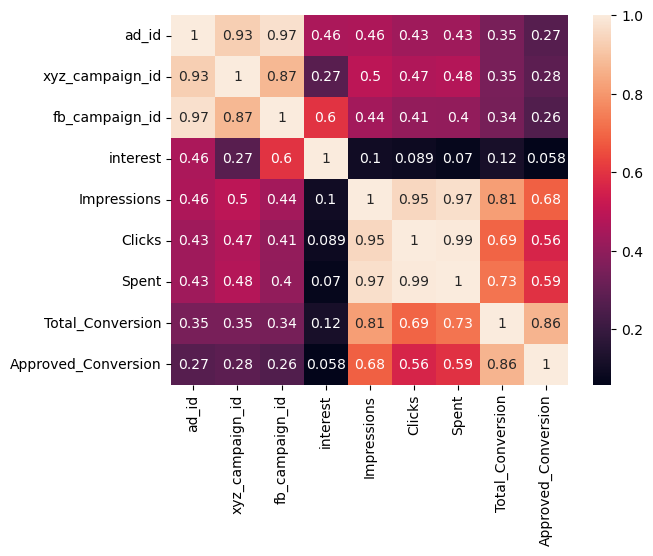

In [22]:
sns.heatmap(correlation, xticklabels = correlation.columns , yticklabels = correlation.columns, annot = True)


### Importance of Pair Plots in Exploratory Data Analysis (EDA)
#### . Visualize distributions: Understand the distribution of single variables.
#### . Identify relationships: Observe linear or nonlinear relationships between variables.
#### . Detect anomalies: Spot outliers that may indicate errors or unique insights.

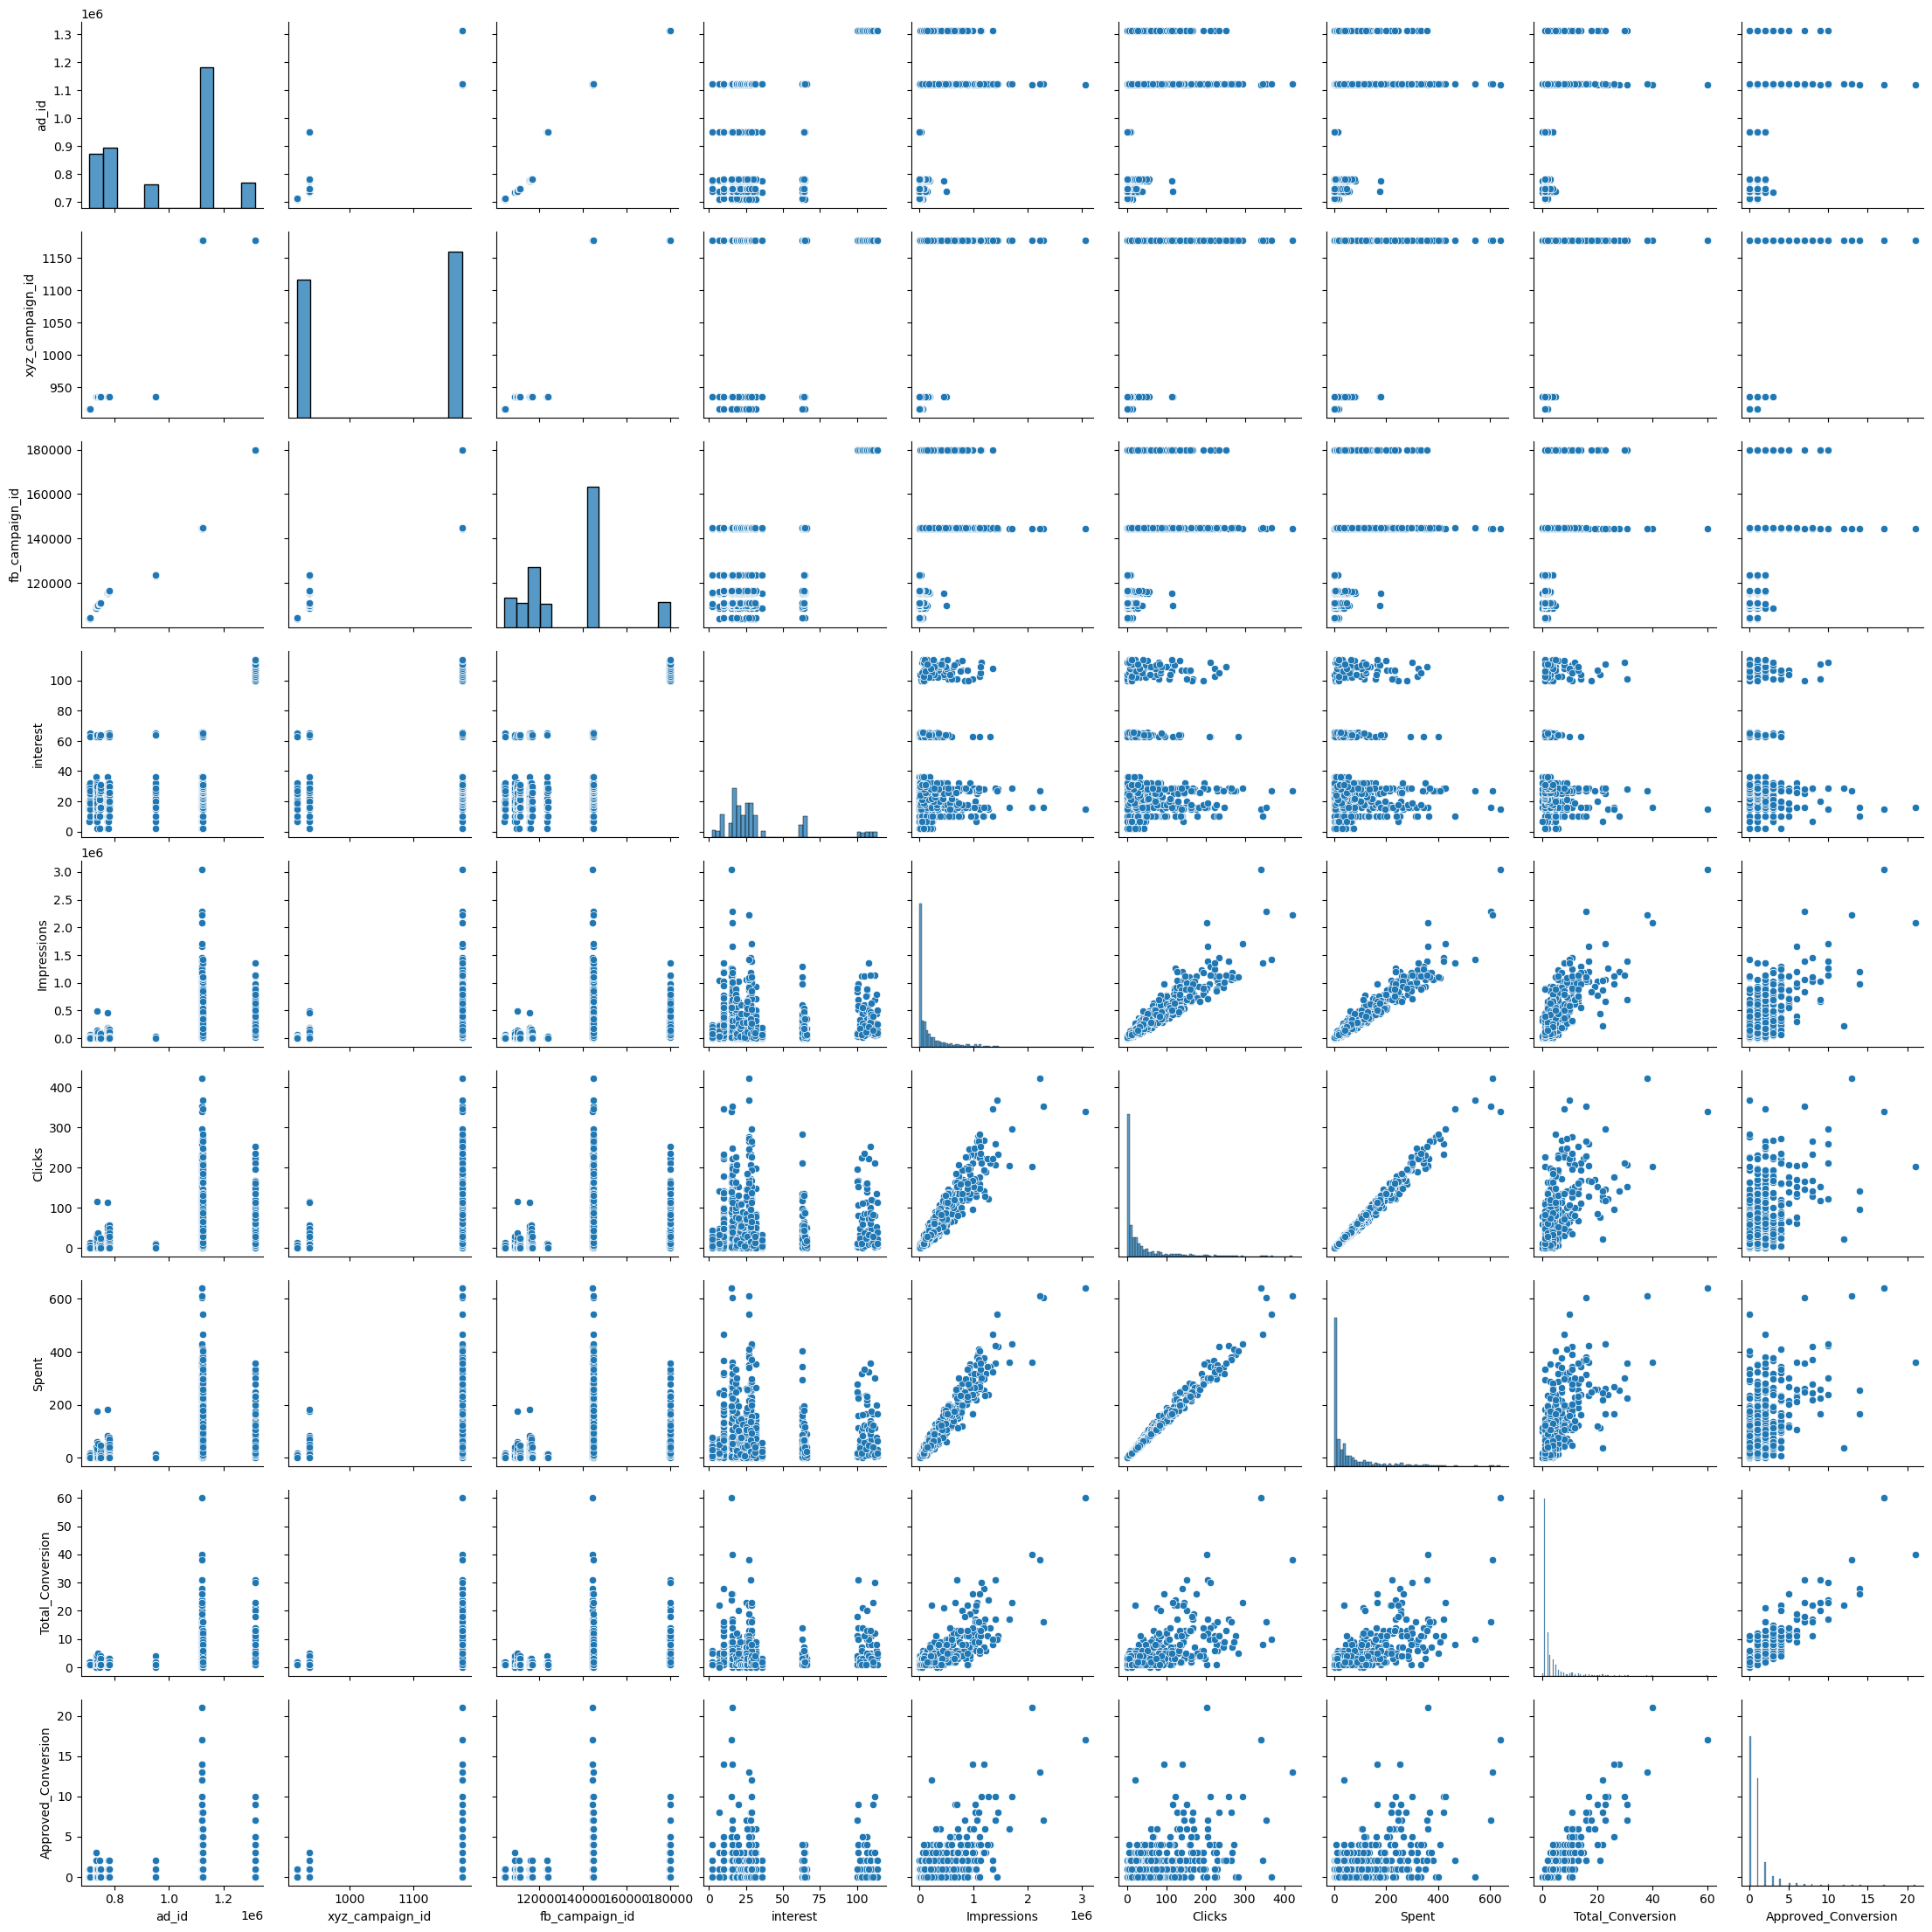

In [83]:
sns.pairplot(data)

### Here we calculated how many males and females are there

In [27]:
male = (data['gender'] == 'M').sum()
print(male)
female= (data['gender'] == 'F').sum()
print(female)


592
551


### Distribution Analysis of Gender and Age in Social Media Ad Campaigns

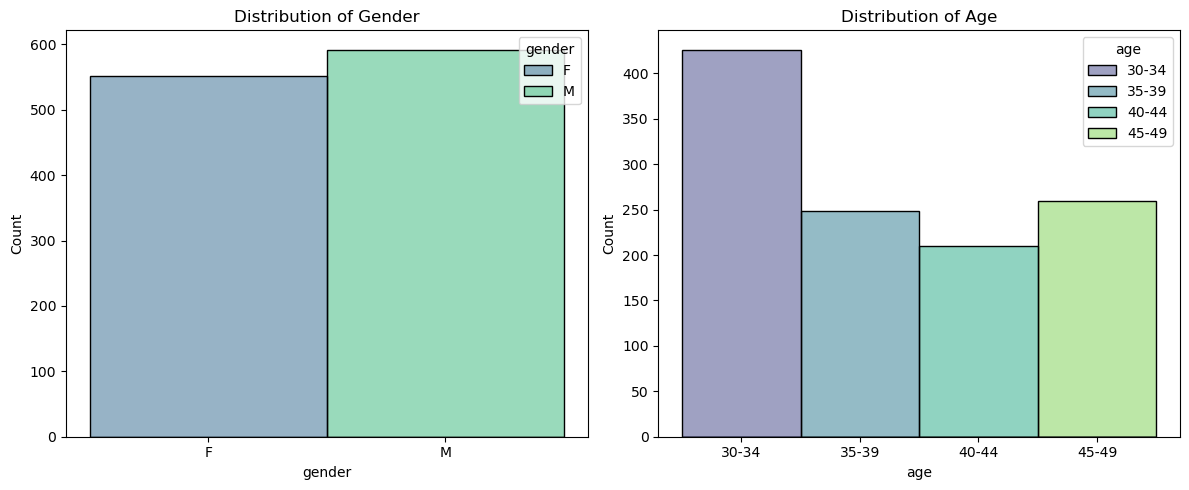

In [28]:
fig, axes = plt.subplots(1,2, figsize=(12,5))
axes = axes.flatten()
sns.histplot(data = data , x = 'gender' , kde = True, palette='viridis', ax = axes[0], hue = 'gender')
axes[0].set_title('Distribution of Gender')
axes[0].set_ylabel('Count')

sns.histplot(data=data , x = 'age' , bins = 5 , kde = True , ax = axes[1] , palette = 'viridis'  , hue = 'age')
axes[1].set_title('Distribution of Age')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

### Gender-Based Distribution of Key Performance Indicators in Ad Campaigns

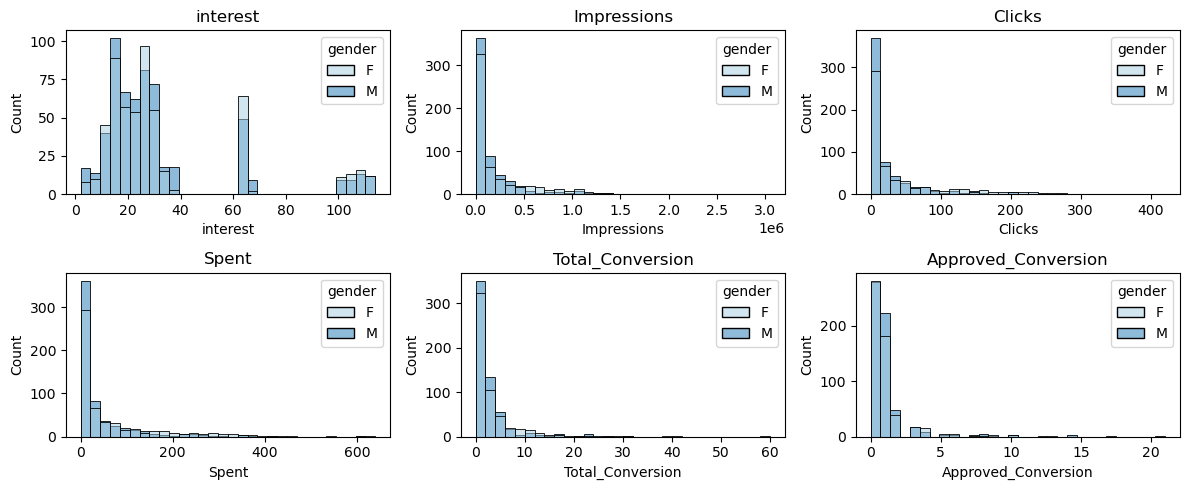

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(2,3, figsize=(12,5))
axes = axes.flatten()

numerical_columns = ['interest', 'Impressions', 'Clicks', 'Spent', 'Total_Conversion' , 'Approved_Conversion']

for i, col in enumerate(numerical_columns):
    sns.histplot(data=data, x=col, hue='gender', bins=30, palette = 'Paired' , ax=axes[i])
    axes[i].set_title(col)
    
plt.tight_layout()
plt.show()


In [30]:
data['xyz_campaign_id'].value_counts()

xyz_campaign_id
1178    625
936     464
916      54
Name: count, dtype: int64

### Observations by Gender for Each XYZ Campaign

Text(0.5, 1.0, 'Observation per xyz campaign')

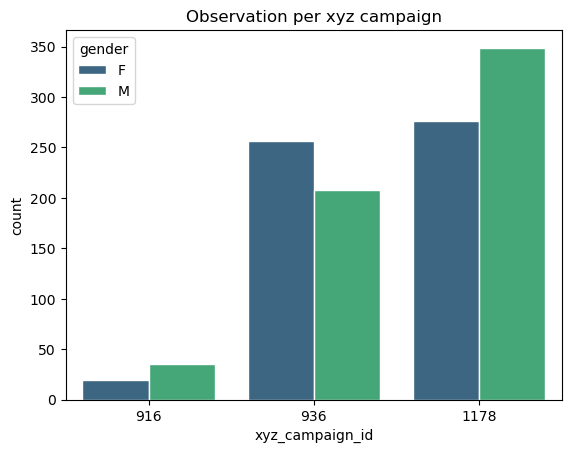

In [31]:
sns.countplot(x = 'xyz_campaign_id' , hue = 'gender',palette = 'viridis',data = data,edgecolor = 'white')
plt.title('Observation per xyz campaign')

### Observations by Age for Each XYZ Campaign

Text(0.5, 1.0, 'Observation per xyz campaign')

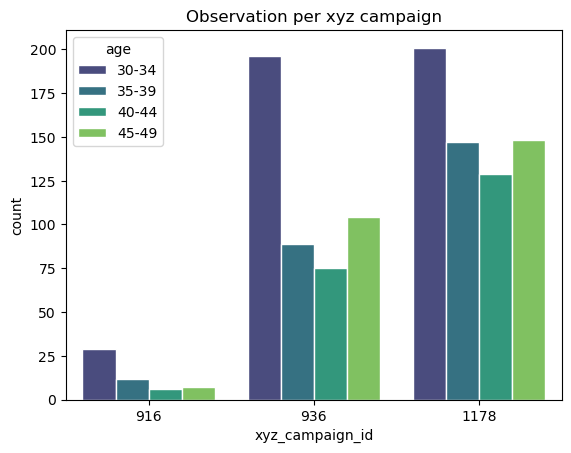

In [32]:
sns.countplot(x = 'xyz_campaign_id' , hue = 'age',palette = 'viridis',data = data,edgecolor = 'white')
plt.title('Observation per xyz campaign')

### XYZ Campaign-Based Distribution of Key Performance Indicators in Ad Campaigns

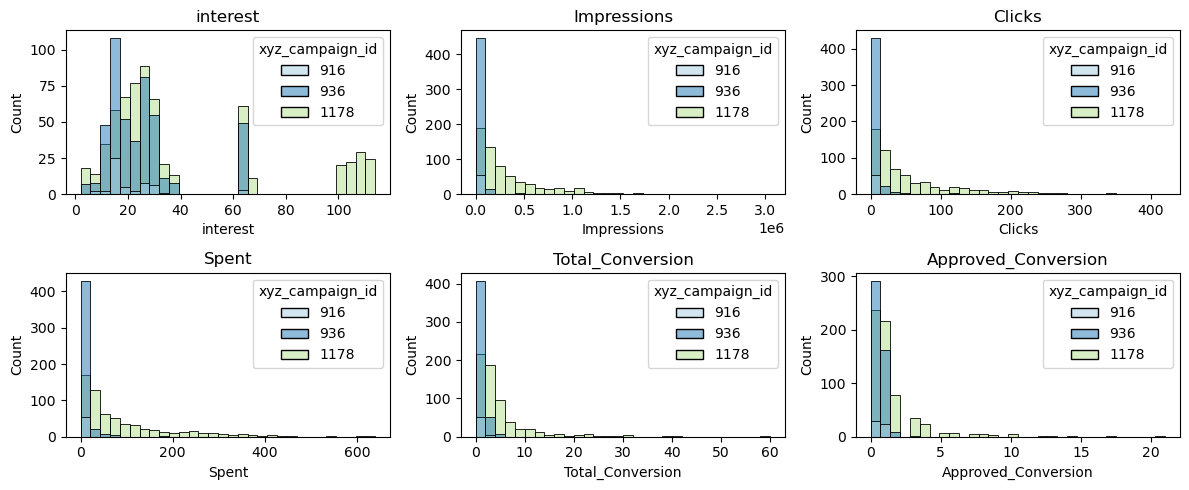

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(2,3, figsize=(12,5))
axes = axes.flatten()

numerical_columns = ['interest', 'Impressions', 'Clicks', 'Spent', 'Total_Conversion' , 'Approved_Conversion']

for i, col in enumerate(numerical_columns):
    sns.histplot(data=data, x=col, hue='xyz_campaign_id', bins=30, palette = 'Paired' , ax=axes[i])
    axes[i].set_title(col)
    
plt.tight_layout()
plt.show()

### Age-Based Distribution of Key Performance Indicators in Ad Campaigns

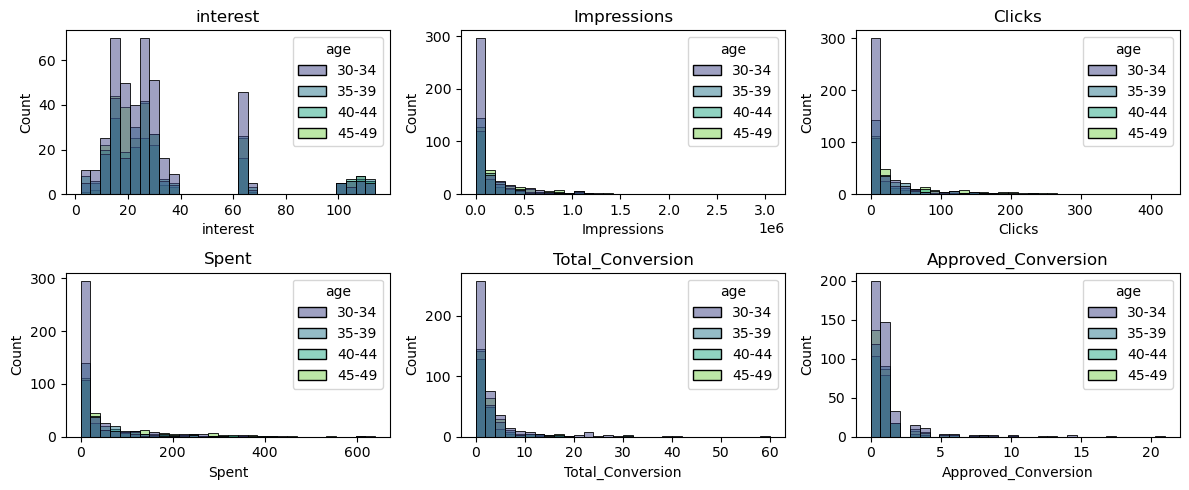

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(2,3, figsize=(12,5))
axes = axes.flatten()

numerical_columns = ['interest', 'Impressions', 'Clicks', 'Spent', 'Total_Conversion' , 'Approved_Conversion']

for i, col in enumerate(numerical_columns):
    sns.histplot(data=data, x=col, hue='age', bins=30, palette = 'viridis' , ax=axes[i])
    axes[i].set_title(col)
    
plt.tight_layout()
plt.show()

### Gender-Based Distribution of Impressions, Clicks, and Interest in Ad Campaigns: Pie Chart Analysis

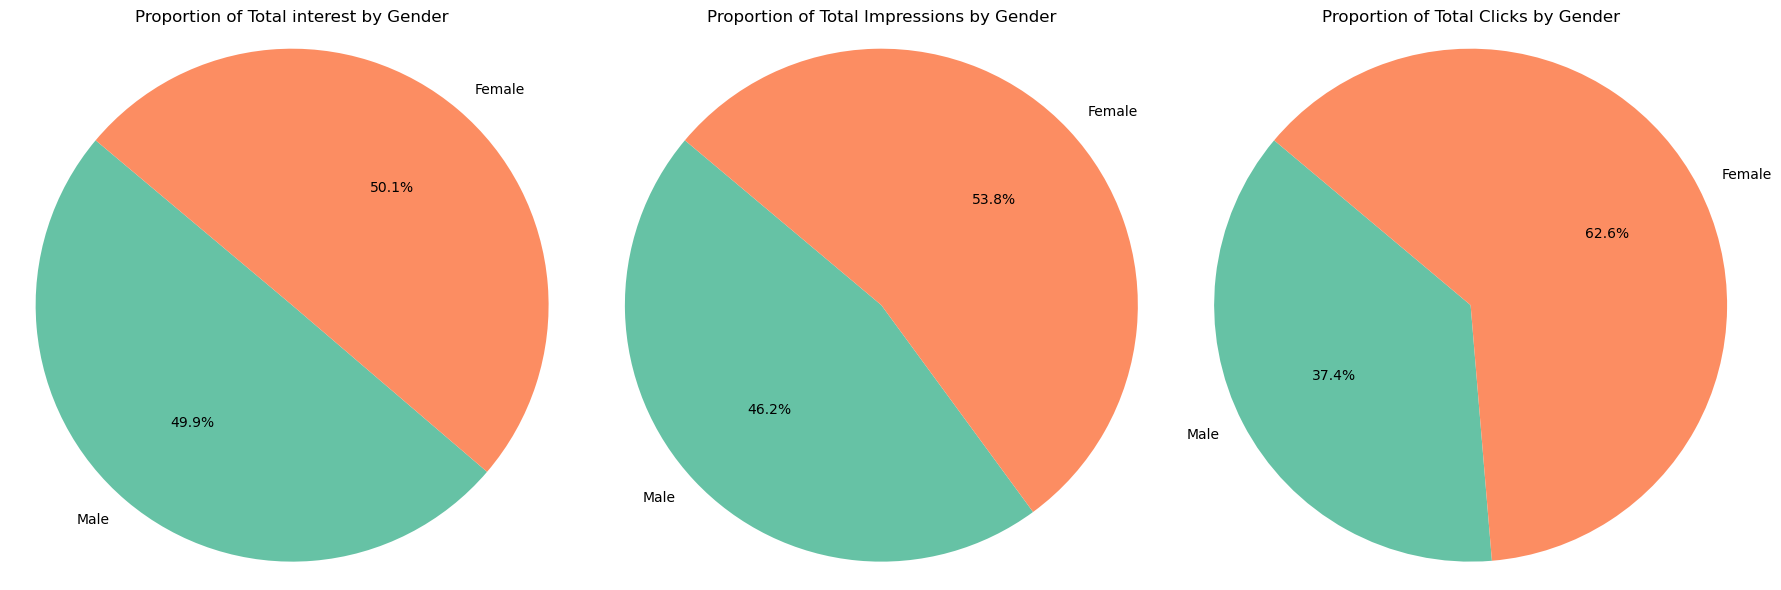

In [133]:
columns = ['interest', 'Impressions', 'Clicks']
labels = ['Male', 'Female']
colors = ['#66c2a5', '#fc8d62']

fig, axs = plt.subplots(1, 3, figsize=(18, 6))

for i, column in enumerate(columns):
    total_male = data[data['gender'] == 'M'][column].sum()
    total_female = data[data['gender'] == 'F'][column].sum()

    total_values = [total_male, total_female]

    axs[i].pie(total_values, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)
    axs[i].set_title(f'Proportion of Total {column} by Gender')
    axs[i].axis('equal')

plt.tight_layout()
plt.show()

### Age-Wise Distribution of Impressions, Clicks, and Interest in Ad Campaigns: Pie Chart Analysis

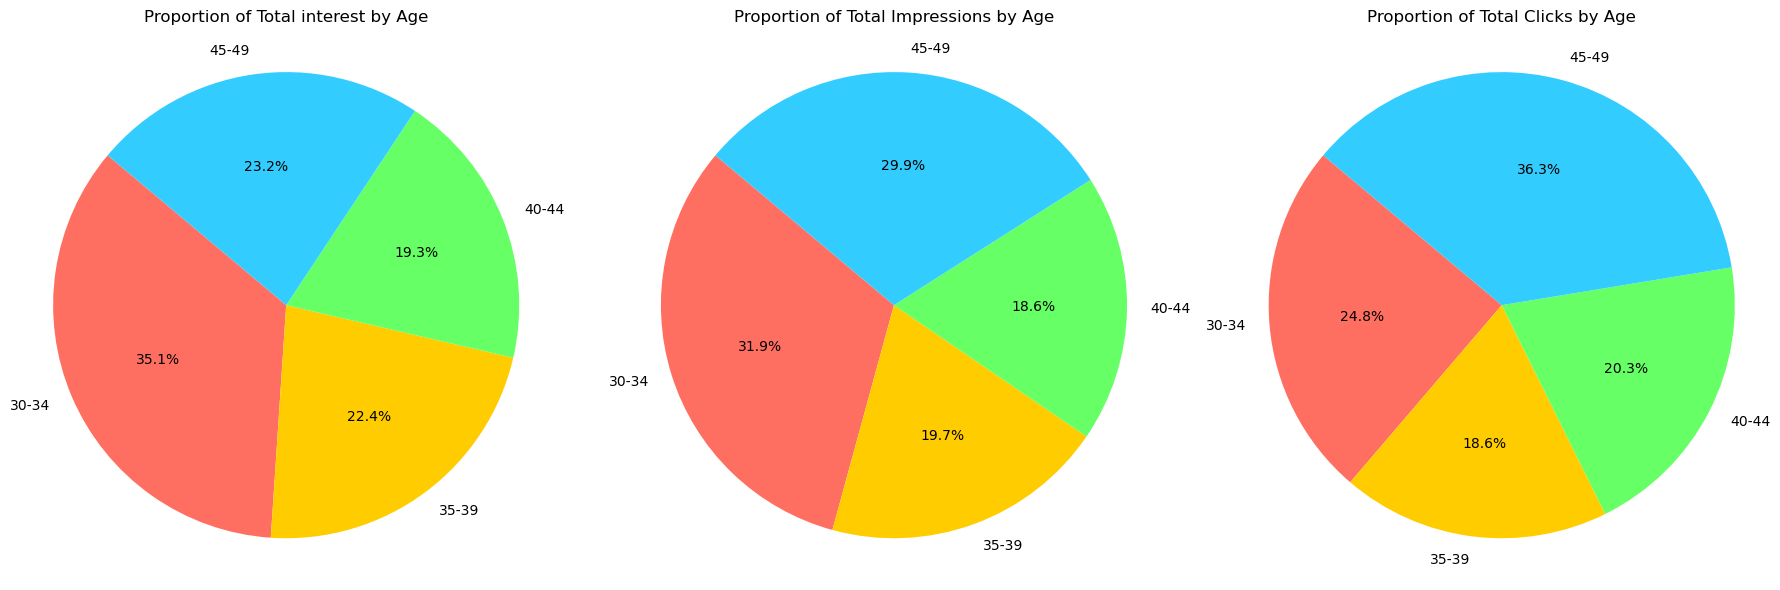

In [139]:
columns = ['interest', 'Impressions', 'Clicks']
labels = ['30-34', '35-39', '40-44', '45-49']
colors = ['#ff6f61', '#ffcc00', '#66ff66', '#33ccff']

fig, axs = plt.subplots(1, 3, figsize=(18, 6))

for i, column in enumerate(columns):
    total_a = data[data['age'] == '30-34'][column].sum()
    total_b = data[data['age'] == '35-39'][column].sum()
    total_c = data[data['age'] == '40-44'][column].sum()
    total_d = data[data['age'] == '45-49'][column].sum()

    total_values = [total_a, total_b, total_c, total_d]

    axs[i].pie(total_values, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)
    axs[i].set_title(f'Proportion of Total {column} by Age')
    axs[i].axis('equal')

plt.tight_layout()
plt.show()

### Stacked Bar Chart of Total and Approved Conversions by Gender in Ad Campaigns

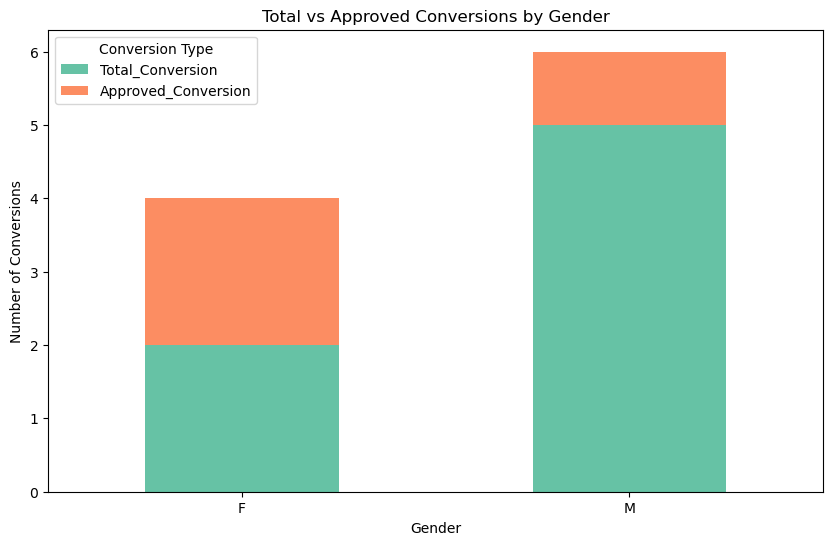

In [145]:
import matplotlib.pyplot as plt
import pandas as pd

# Sample data (replace with your actual data)
data = {
    'gender': ['M', 'M', 'M', 'F', 'F'],
    'Total_Conversion': [2, 2, 1, 1, 1],
    'Approved_Conversion': [1, 0, 0, 1, 1]
}

df = pd.DataFrame(data)

# Group by gender and sum conversions
grouped = df.groupby('gender').sum()

# Plotting
grouped.plot(kind='bar', stacked=True, figsize=(10, 6), color=['#66c2a5', '#fc8d62'])
plt.title('Total vs Approved Conversions by Gender')
plt.ylabel('Number of Conversions')
plt.xlabel('Gender')
plt.xticks(rotation=0)
plt.legend(title='Conversion Type')
plt.show()


### Line Plot Comparing Total and Approved Conversions by Gender in Ad Campaigns

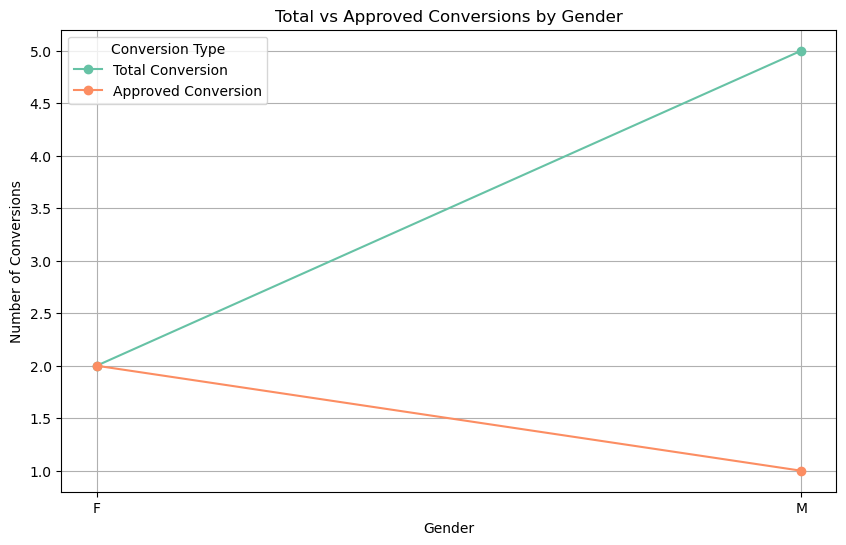

In [147]:
import matplotlib.pyplot as plt
import pandas as pd

# Sample data (replace with your actual data)
data = {
    'gender': ['M', 'M', 'M', 'F', 'F'],
    'Total_Conversion': [2, 2, 1, 1, 1],
    'Approved_Conversion': [1, 0, 0, 1, 1]
}

df = pd.DataFrame(data)

# Group by gender and sum conversions
grouped = df.groupby('gender').sum()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(grouped.index, grouped['Total_Conversion'], marker='o', label='Total Conversion', color='#66c2a5')
plt.plot(grouped.index, grouped['Approved_Conversion'], marker='o', label='Approved Conversion', color='#fc8d62')
plt.title('Total vs Approved Conversions by Gender')
plt.ylabel('Number of Conversions')
plt.xlabel('Gender')
plt.xticks(rotation=0)
plt.legend(title='Conversion Type')
plt.grid()  # Add grid for better readability
plt.show()
